In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset as a dataframe pandas

df = pd.read_csv('../data/external/Bank_Customer_Churn_Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Print the shape of the dataframe

print(df.shape)

(10000, 12)


In [5]:
# Check missing values

df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

As we can see, there is no missing values

# Univariate analysis

## Categorical columns

#### Column Churn

In [6]:
df.churn.value_counts(normalize=True)*100

0    79.63
1    20.37
Name: churn, dtype: float64

In [7]:
fig = px.bar(df.churn.value_counts(), x=df.churn.value_counts().index, y=df.churn.value_counts().values,width = 500 ,  height = 400)
fig.show()

We notice that there is a significant imbalance in the classes to be predicted

#### Column country

In [8]:
df.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [9]:
fig = px.pie(df.country.value_counts(), values=df.country.value_counts().values, names=df.country.value_counts().index,
title='Country of the client',width=600,height=400)
fig.show()

We can notice the majority of customers are French. The rest is shared equally between Germans and Spaniards

#### Column gender

In [10]:
fig = px.bar(df.gender.value_counts(), x=df.gender.value_counts().index, y=df.gender.value_counts().values,width = 500 ,  height = 400)
fig.show()

We notice that there are slightly more men than women in our clientele

#### Column credit_card

In [11]:
fig = px.bar(df.credit_card.value_counts(), x=df.credit_card.value_counts().index, y=df.credit_card.value_counts().values,width = 500 ,  height = 400)
fig.show()

The majority of our customers have a credit card

#### Column tenure

In [12]:
fig = px.pie(df.tenure.value_counts(), values=df.tenure.value_counts().values, names=df.tenure.value_counts().index,
title='Tenure of the clients',width=600,height=400)
fig.show()

There is practically the same share of clients for each category of tenure except for classes 0 and 10 which are inferior

#### Column active_member

In [13]:
fig = px.bar(df.active_member.value_counts(), x=df.active_member.value_counts().index, y=df.active_member.value_counts().values,width = 500 ,  height = 400)
fig.show()

There are slightly more active members than passive members

#### Column products_number

In [43]:
fig = px.pie(df.products_number.value_counts(), values=df.products_number.value_counts().values, names=df.products_number.value_counts().index,
title='Products number of the client',width=600,height=400)
fig.show()

The majority of customers have 1 or 2 products that the bank offers.

## Numerical columns

#### Column estimated_salary

<AxesSubplot:xlabel='estimated_salary', ylabel='Density'>

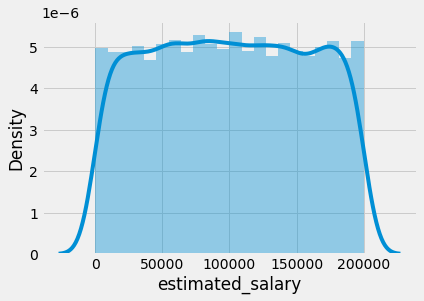

In [14]:
sns.distplot(df.estimated_salary)

#### Column balance

<AxesSubplot:xlabel='balance', ylabel='Density'>

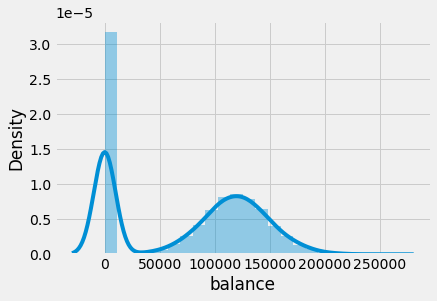

In [15]:
sns.distplot(df.balance)

On both intervals, the curve follows a normal distribution.

#### Column credit_score

<AxesSubplot:xlabel='credit_score', ylabel='Density'>

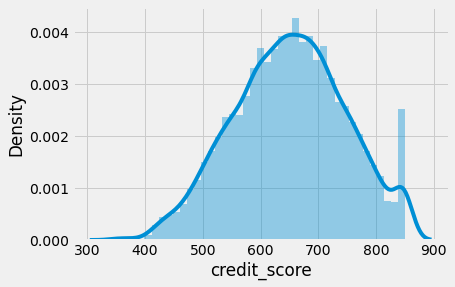

In [16]:
sns.distplot(df.credit_score)

The majority of customers have credit scores between 600 and 700

# Bivariate analysis

In [17]:
# Create a dataframe for only the persons who did a churn
churn_df = df[df.churn == 1]

# Create a dataframe for only the persons who didn't a churn
no_churn_df = df[df.churn == 0]

## Categorical features / Churn

#### Country / Churn

<AxesSubplot:xlabel='country', ylabel='count'>

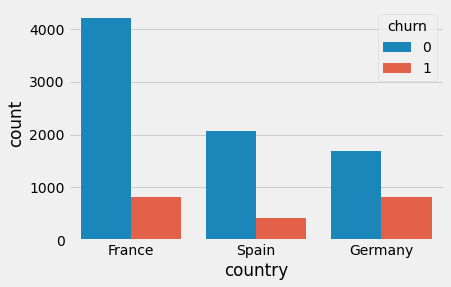

In [18]:
sns.countplot(x=df.country , data=df , hue='churn')

We note that the Germans and the French have the same proportion of churn knowing that the French are twice as numerous. We can therefore deduce that there is a high proportion of churn among German customers

#### Gender / Churn

<AxesSubplot:xlabel='gender', ylabel='count'>

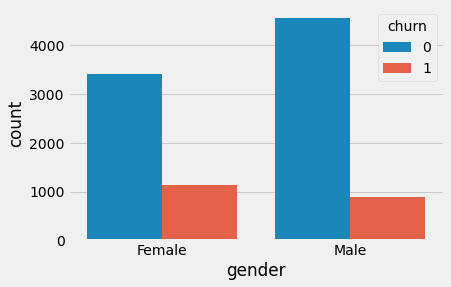

In [19]:
sns.countplot(x=df.gender , data=df , hue='churn')

We note that the proportion of churn is higher among women, while we have a higher proportion of men in our clientele. The probability of a woman leaving the bank is therefore greater than that of a man leaving it.

#### Credit_card / Churn

<AxesSubplot:xlabel='credit_card', ylabel='count'>

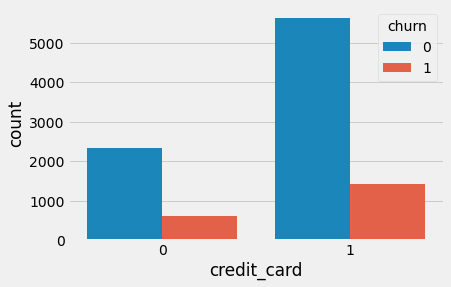

In [22]:
sns.countplot(x=df.credit_card , data=df , hue='churn')

In [27]:
print("Churn rate for people with a credit card : " + str((1500 /7000)*100))
print("Churn rate for people who do not have a credit card : " + str((700/3100)*100))

Churn rate for people with a credit card : 21.428571428571427
Churn rate for people who do not have a credit card : 22.58064516129032


We note that the proportion of churn among those who have a credit card and those who do not is virtually the same. We can therefore deduce that this variable does not have much influence on the target variable.


#### Tenure / Churn

<AxesSubplot:xlabel='tenure', ylabel='count'>

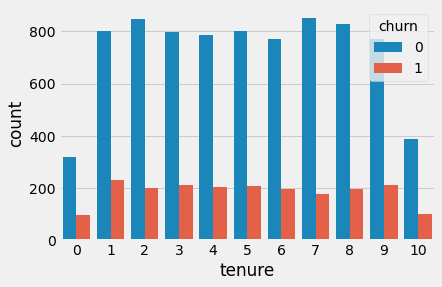

In [26]:
sns.countplot(x=df.tenure , data=df , hue='churn')

In [33]:
print("Churn rate for people with a teure = 0 : " + str(80/(330+80)))
print("Churn rate for people with a tenure = 10 : " + str(100/(400+100)))
print("Churn rate for the others : " + str(200/(800+200)))

Churn rate for people with a teure = 0 : 0.1951219512195122
Churn rate for people with a tenure = 10 : 0.2
Churn rate for the others : 0.2


We note that the proportion of churn among the three categories is the same. We can therefore deduce that this variable does not have much influence on the target variable.

#### Active_member / Churn

<AxesSubplot:xlabel='active_member', ylabel='count'>

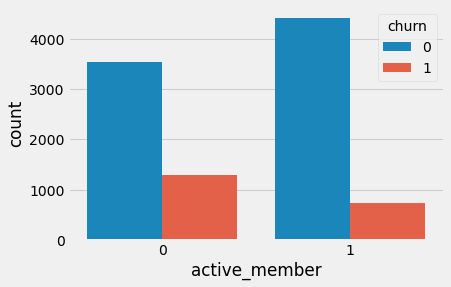

In [34]:
sns.countplot(x=df.active_member , data=df , hue='churn')

Among active_members, there is more non churn than among non-active members and less churn. We can therefore assume that if a customer is not an active member, he has more chance of churn than an active member.

#### Products_number / Churn

<AxesSubplot:xlabel='products_number', ylabel='count'>

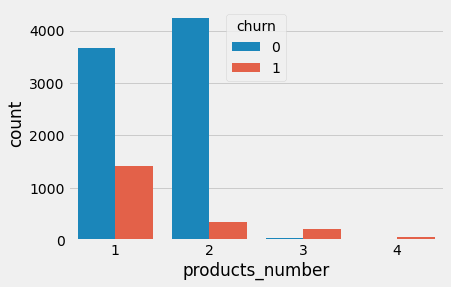

In [44]:
sns.countplot(x=df.products_number , data=df , hue='churn')

We notice that the share of non churn is higher for people who have 2 products from the bank than for people who have a lower share of churn.

## Numerical features / Churn

#### Estimated salary / Churn

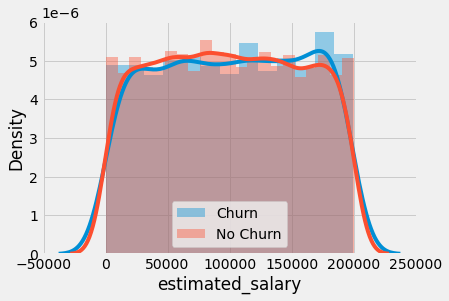

In [38]:
plt.figure()
sns.distplot(churn_df.estimated_salary , label='Churn')
sns.distplot(no_churn_df.estimated_salary , label = 'No Churn')
plt.legend()

The two curves are supperposed, so the estimated_salary variable has no influence on the churn of a customer.

#### Balance / Churn

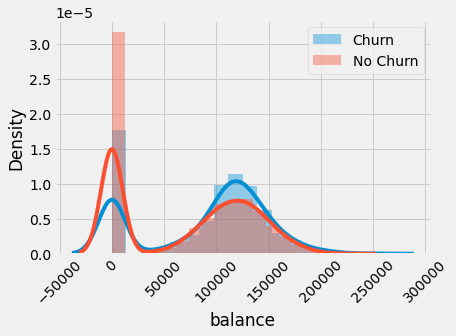

In [39]:
plt.figure()
sns.distplot(churn_df.balance , label='Churn')
sns.distplot(no_churn_df.balance , label = 'No Churn')
plt.xticks(rotation=45)
plt.legend()

We notice that the proportion of non churn is higher for people with a balance below 50 000. On the other hand, between 50 000 and 200 000 of balance, the proportion of churn is higher. The balance feature influences the target variable.

#### Credit_score / Churn

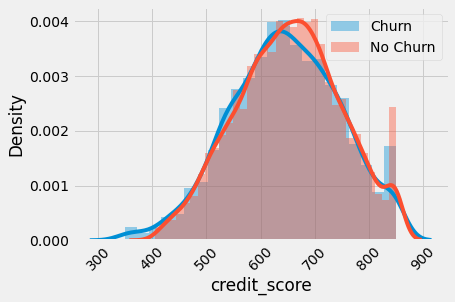

In [40]:
plt.figure()
sns.distplot(churn_df.credit_score , label='Churn')
sns.distplot(no_churn_df.credit_score , label = 'No Churn')
plt.xticks(rotation=45)
plt.legend()

The curves are almost superimposed except between 630 and 730 of credit_score where we notice the share of non churn is more important.

# Correlation matrix

<AxesSubplot:>

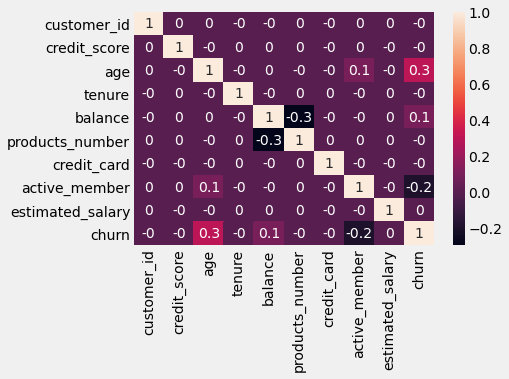

In [41]:
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr , annot=True)